
# How to Train YOLOv8 Object Detection Model on a Custom Dataset

## Steps in this Tutorial

In this tutorial, we are going to cover:

1. Before you start
2. Install YOLOv8
3. Preparing a custom dataset
4. Custom Training
5. Validate Custom Model
6. Inference with Custom Model
7. Export Model
**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Runtime` -> `Change Runtime Type`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Jun 24 06:24:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8
There are two ways to install YOLOv8
- From the source (for development)
- Via pip (recommended)

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone https://github.com/ultralytics/ultralytics.git
# %cd {HOME}/ultralytics
# !pip install -e .


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible.

In [ ]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

### Download the Insects Dataset
This dataset is part of RF100, an Intel-sponsored initiative to create a new object detection benchmark for model generalizability. The dataset includes 995 images. Different types of insects such as `army worm`, `legume blister beetle`, `red spider`, `rice gall midge`, `rice leaf roller`, `rice leafhopper`, `rice water weevil`, `wheat phloeothrips`,`white backed plant hopper`, `yellow rice borer` are annotated in YOLOv8 format.

In [ ]:
!gdown 1K-3ffHYrnGj0b_MrjKvIvBmdFj0HtoFJ -O dataset.zip


Downloading...
From: https://drive.google.com/uc?id=1K-3ffHYrnGj0b_MrjKvIvBmdFj0HtoFJ
To: /content/dataset.zip
100% 8.71M/8.71M [00:00<00:00, 58.1MB/s]


You may use this notebook with your own dataset as well. To use this example with your own dataset, place your zip data file into the`/content` (HOME Directory of the Notebook) directory.

In [ ]:
#!unzip "PATH/TO/YOUR/ZIP/FILE" -d "datasets"

!unzip "dataset.zip" -d "datasets"


Archive:  dataset.zip
   creating: datasets/test/
   creating: datasets/test/images/
  inflating: datasets/test/images/101_jpg.rf.71a40617309b72ad3bf19ead7c72ca75.jpg  
  inflating: datasets/test/images/103_jpg.rf.8984ce8a276b6f528a1d9cb758e9c60c.jpg  
  inflating: datasets/test/images/10_jpg.rf.85c6f87be5c13522e4852729f3ba0353.jpg  
  inflating: datasets/test/images/112_jpg.rf.fb1e25a86b013c35be218a7849747560.jpg  
  inflating: datasets/test/images/113_jpg.rf.1f5576e9e7e58cb5f0dbdcd310c90bcb.jpg  
  inflating: datasets/test/images/113_jpg.rf.2a69619ed82c668d79f95bb07a83a4fc.jpg  
  inflating: datasets/test/images/113_jpg.rf.55d133b13be7c6b7ce32f99e36e3ee82.jpg  
  inflating: datasets/test/images/113_jpg.rf.e7667502c16d6df0c7c57e0ef882f470.jpg  
  inflating: datasets/test/images/116_jpg.rf.0f131c97a71280a81620736823c5836e.jpg  
  inflating: datasets/test/images/119_jpg.rf.809b01278c14561545fc3e1cfe8b51ee.jpg  
  inflating: datasets/test/images/125_jpg.rf.0f33a3507d9263fc1314af422dbebf5

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data='{DATA_DIR}/data.yaml' epochs=10 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 221MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,

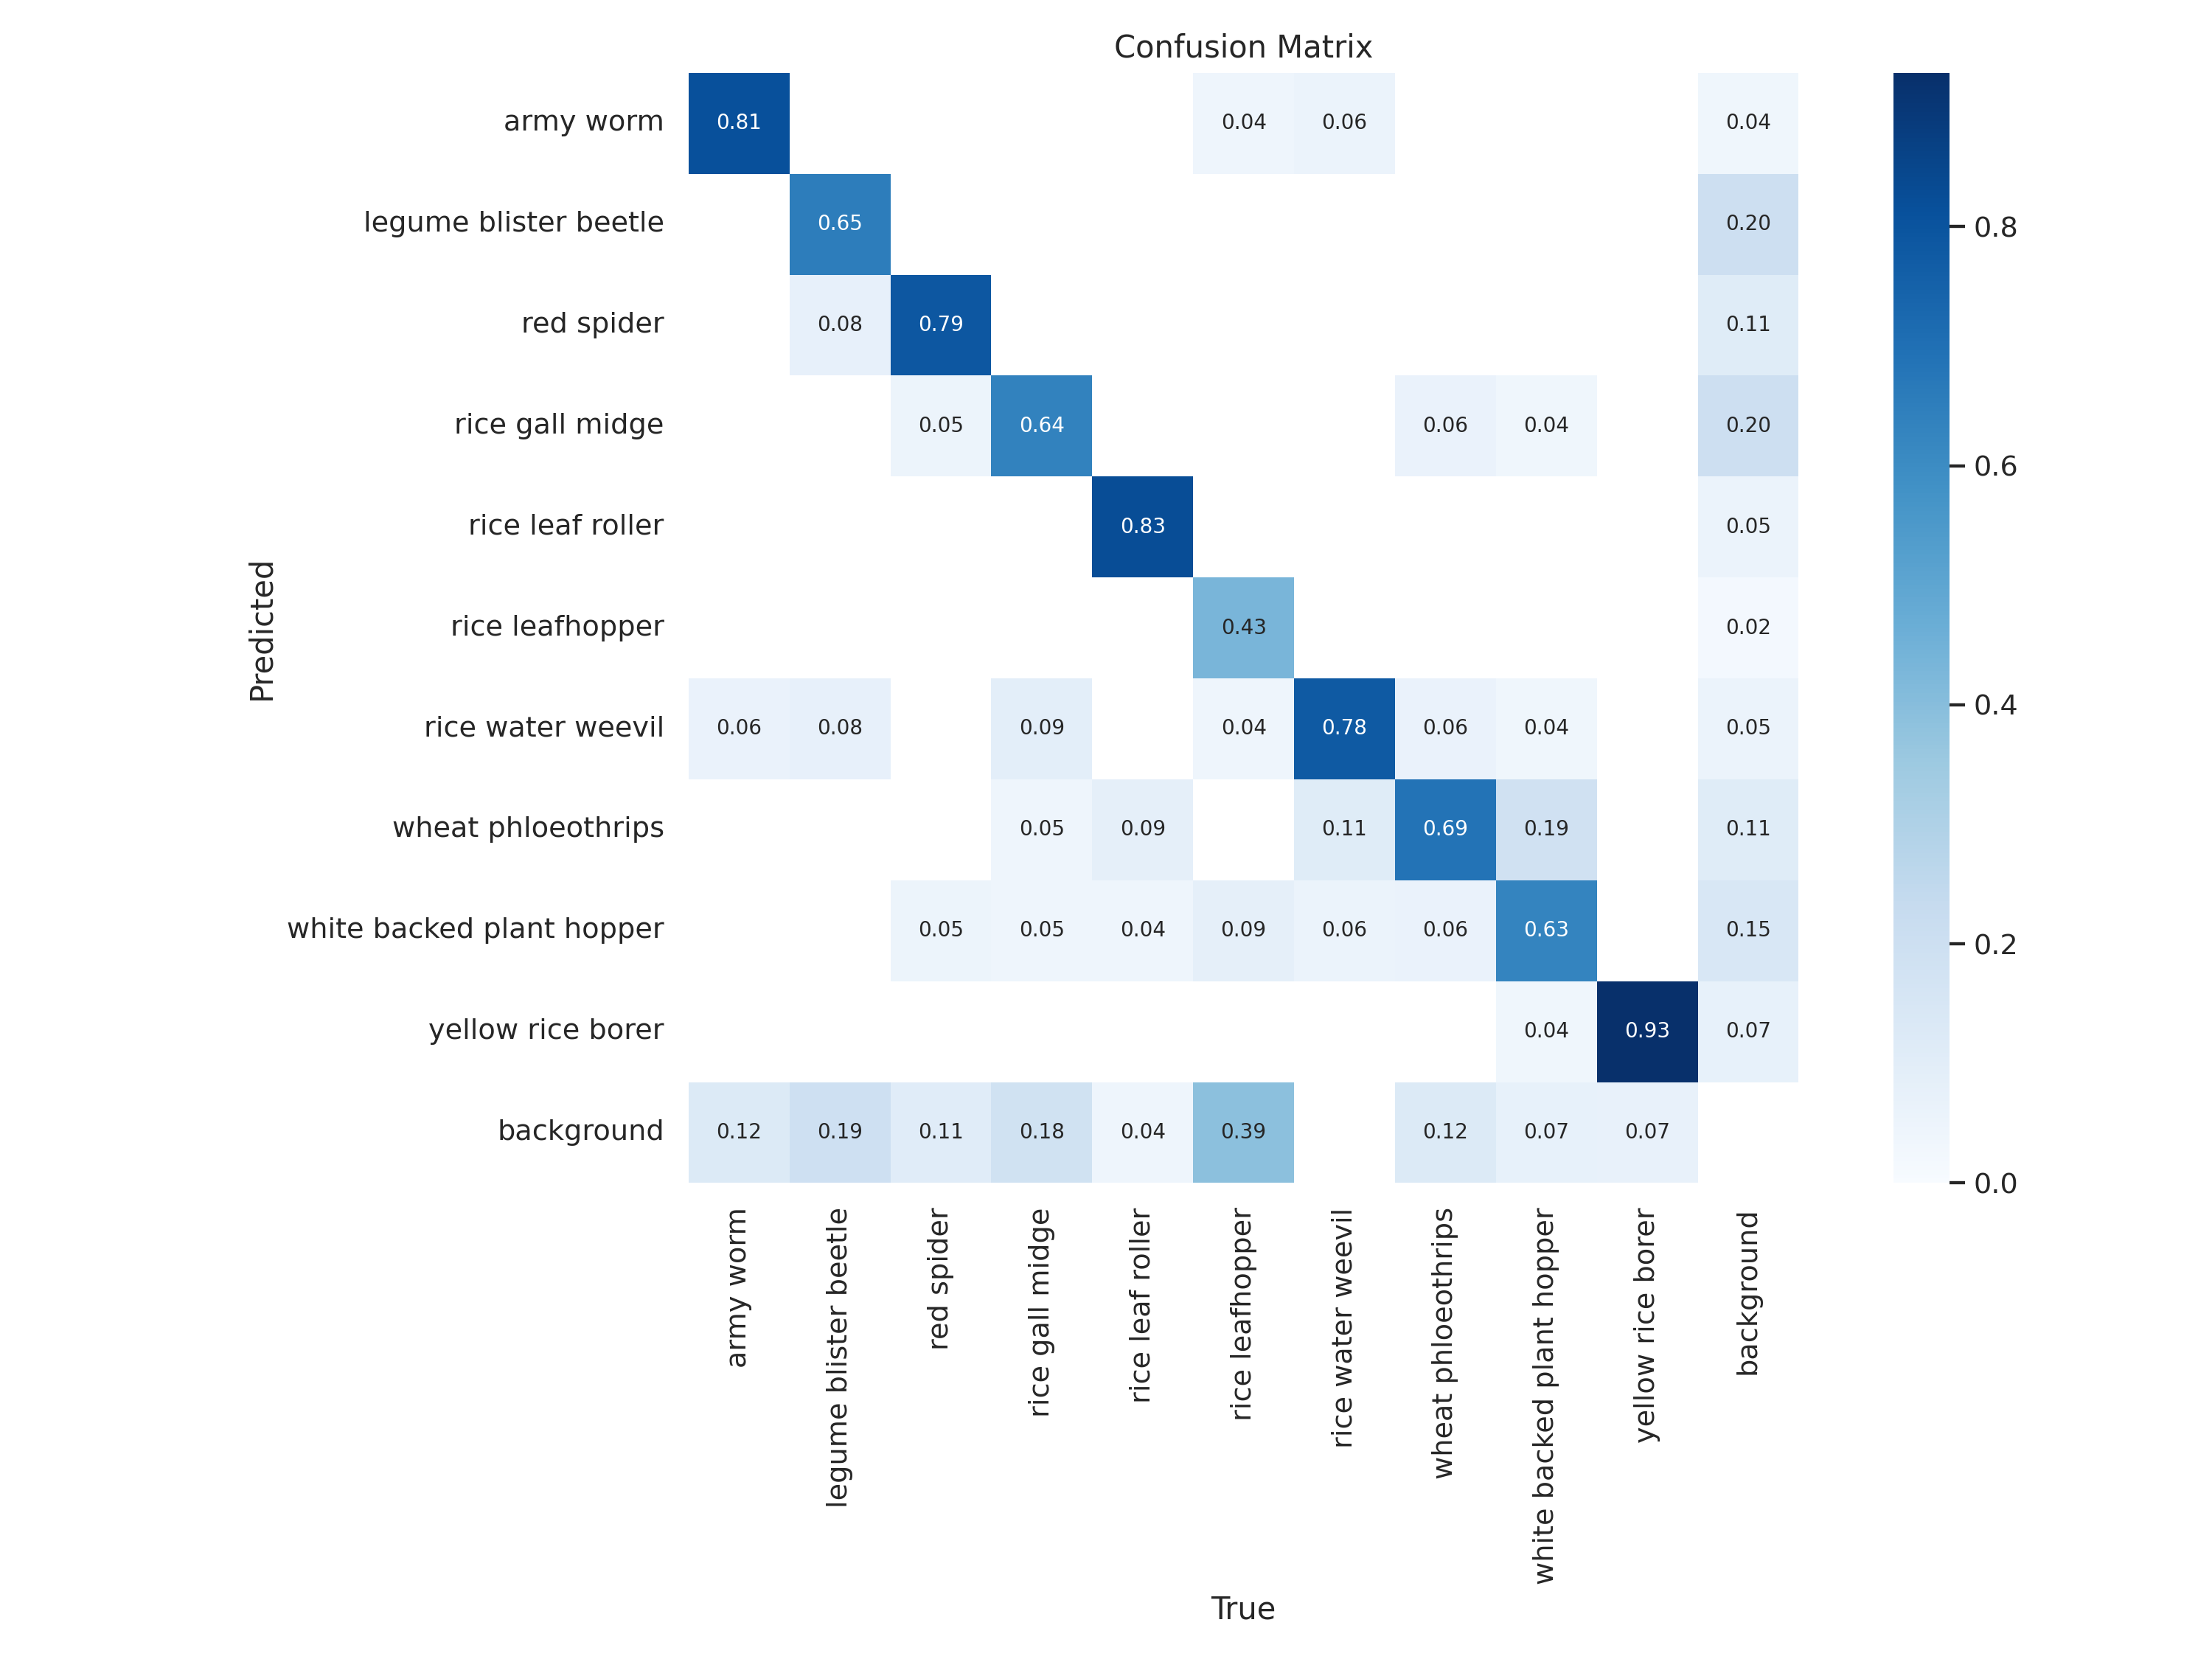

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png')


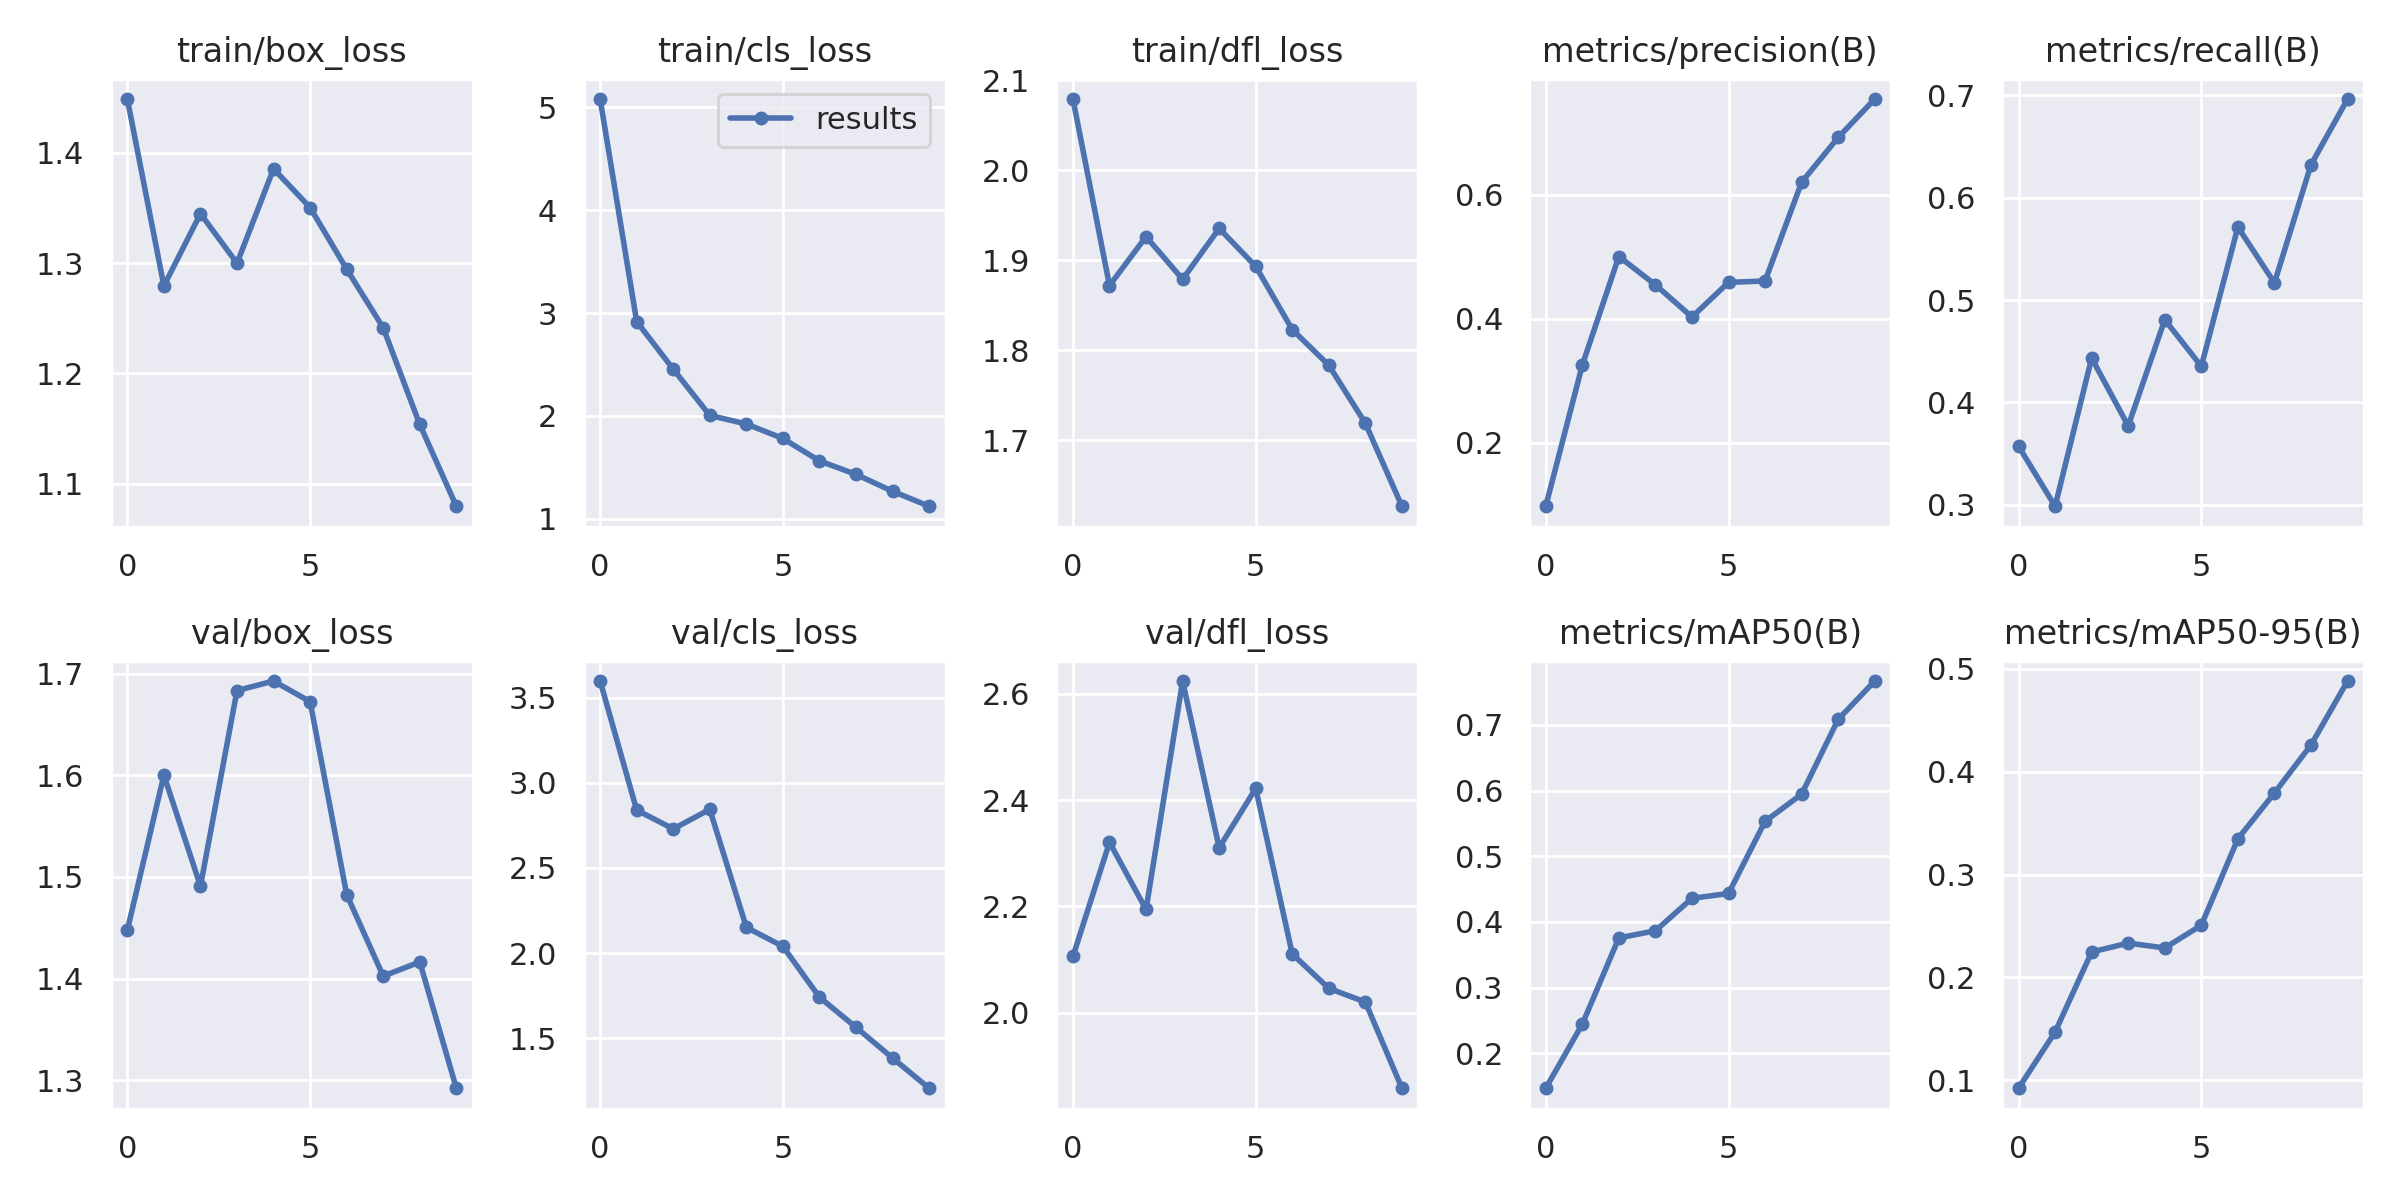

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png')


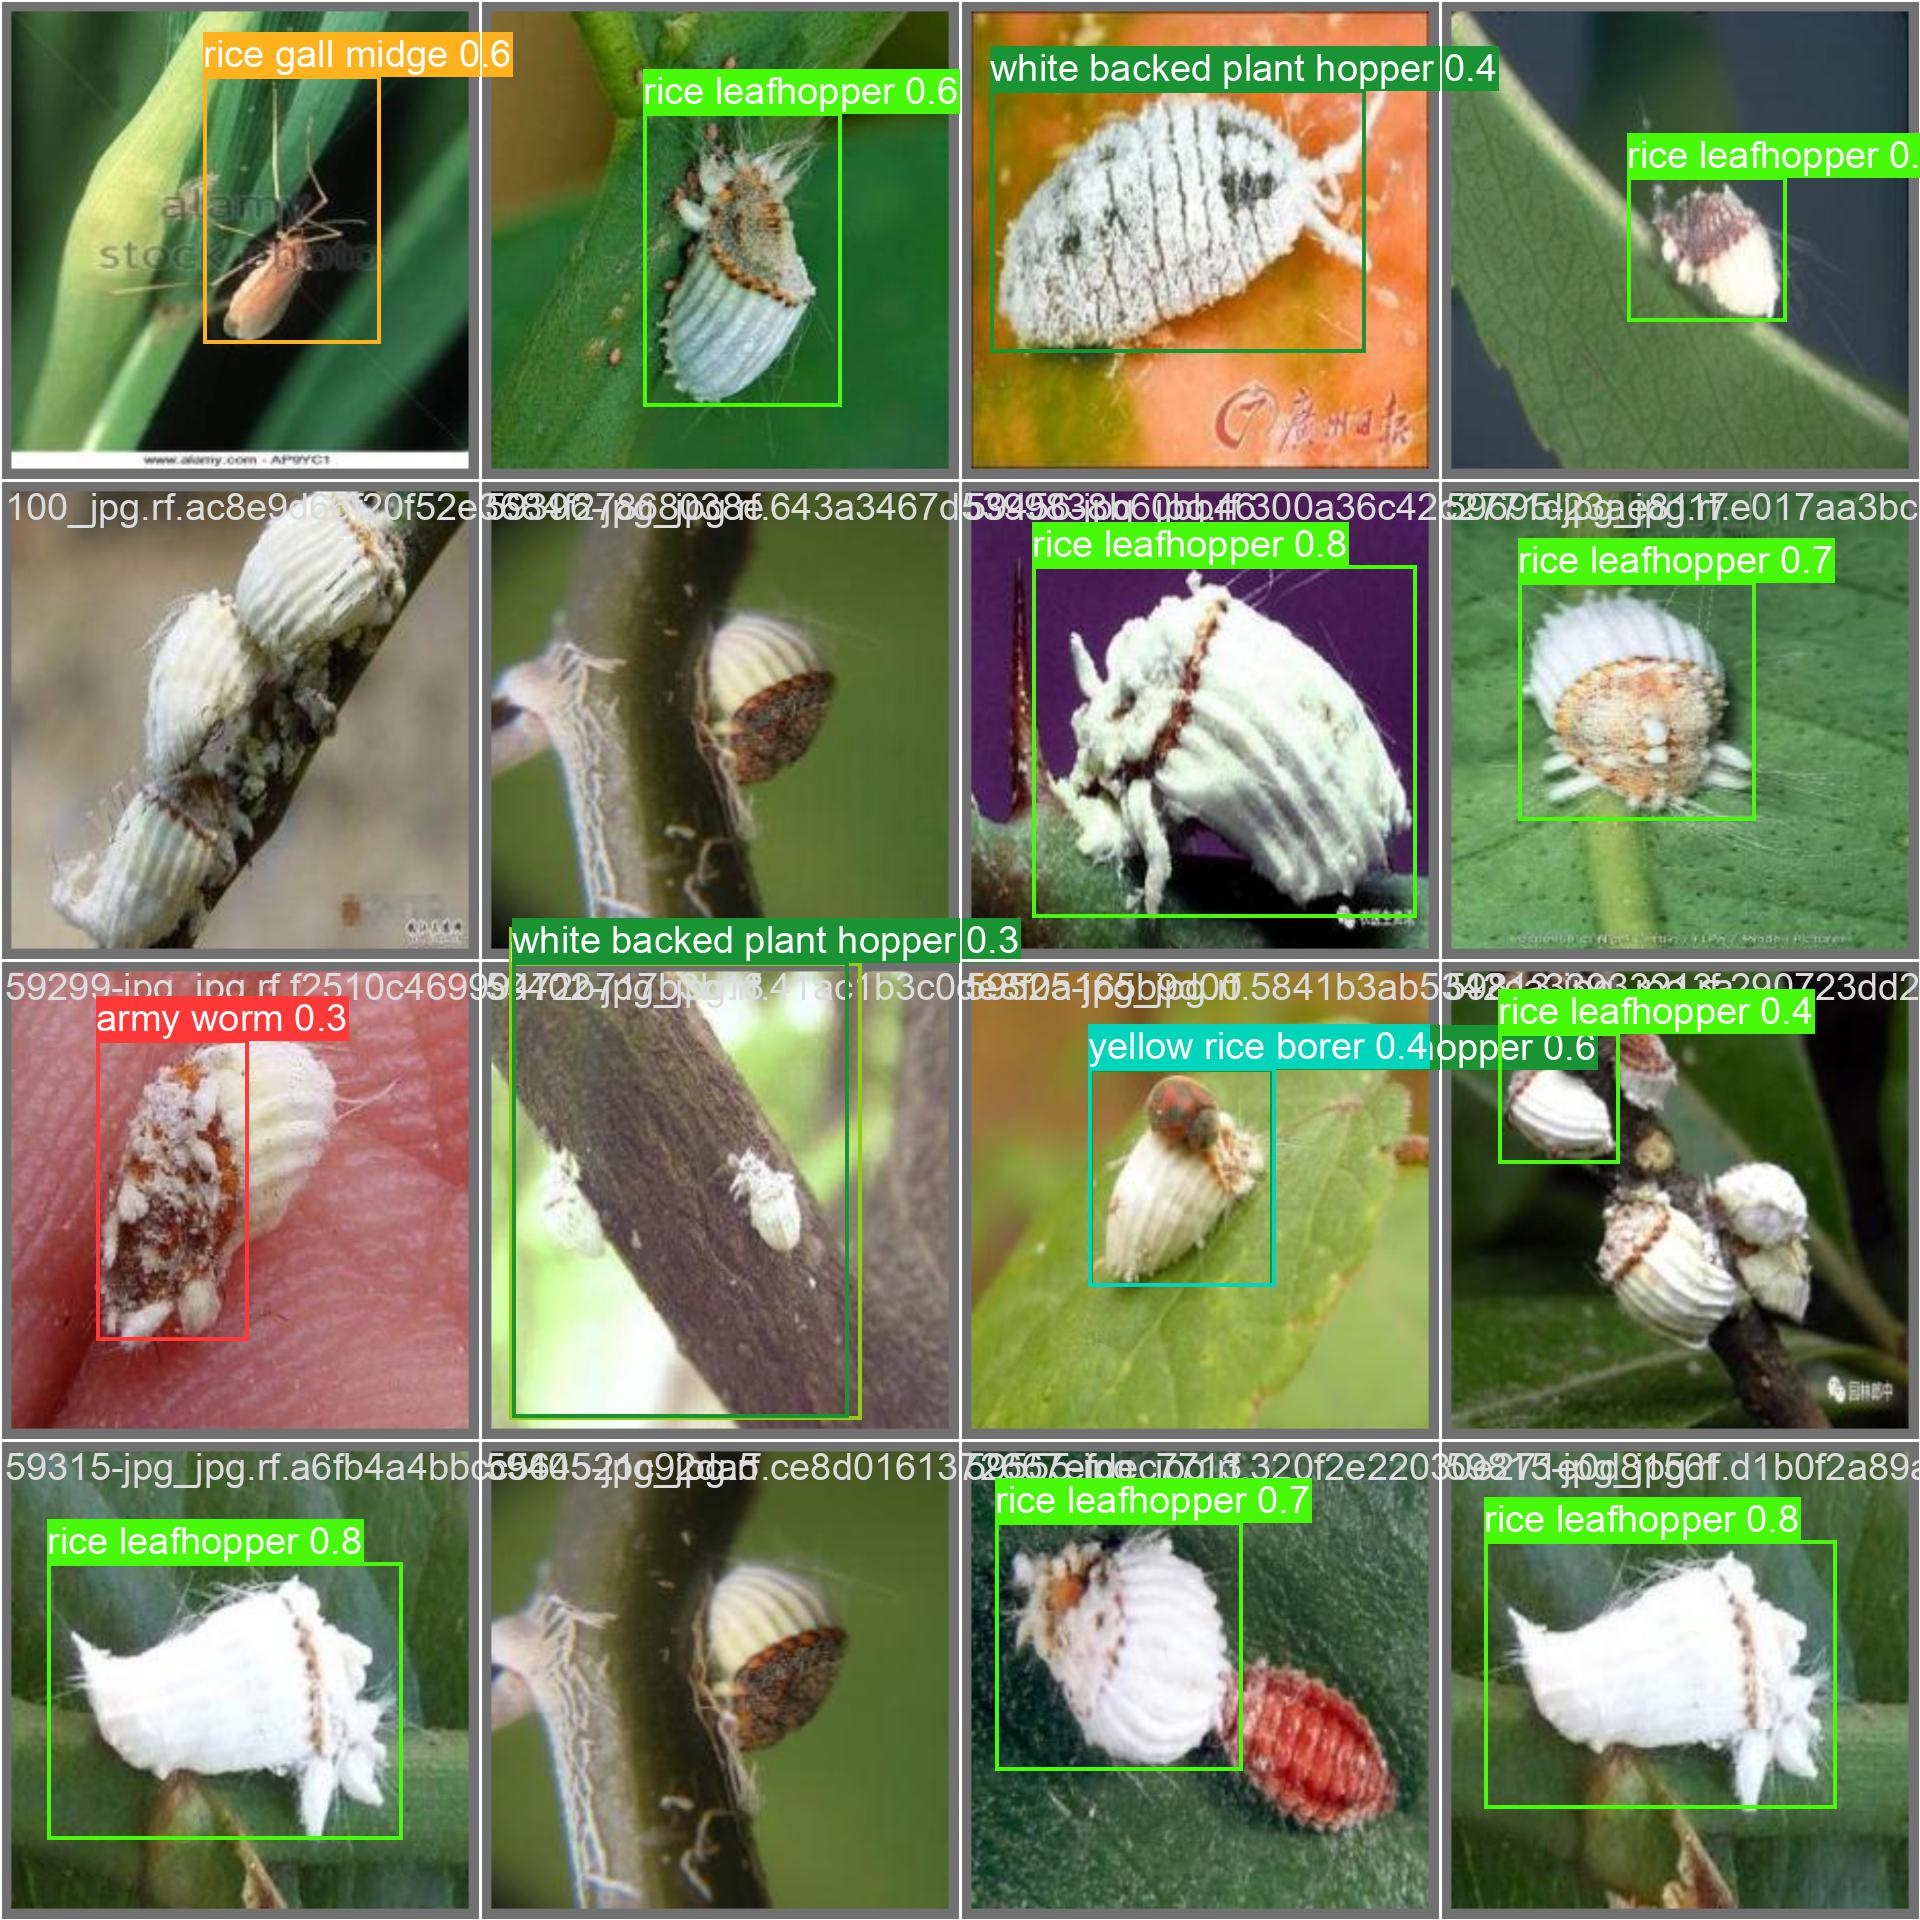

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg')


## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model='{HOME}/runs/detect/train/weights/best.pt' data='{DATA_DIR}/data.yaml'

2023-06-24 07:03:38.927557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 07:03:40.272163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 199 images, 0 backgrounds, 0 corrupt: 100% 199/199 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:07<00:00,  1.70it/s]
                   all        199        204      0.754      0.697      0.769      0.488
             army worm        199         16      0.862    

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model='{HOME}/runs/detect/train/weights/best.pt' conf=0.25 source='{DATA_DIR}/test/images' save=true

2023-06-24 07:04:02.752671: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 07:04:03.631419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs

image 1/100 /content/datasets/test/images/101_jpg.rf.71a40617309b72ad3bf19ead7c72ca75.jpg: 640x640 1 rice leaf roller, 39.5ms
image 2/100 /content/datasets/test/images/103_jpg.rf.8984ce8a276b6f528a1d9cb758e9c60c.jpg: 640x640 1 white backed plant hopper, 37.1ms
image 3/100 /content/datasets/test/images/10_jpg.rf.85c6f87be5c13522e4852729f3ba0353.jpg: 640x640 1 rice water weevil, 37.0ms
image 4/

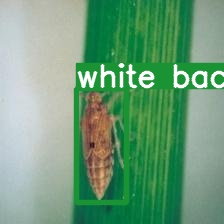

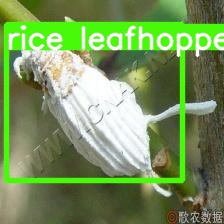

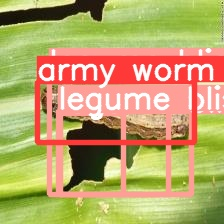

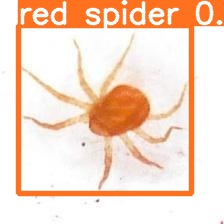

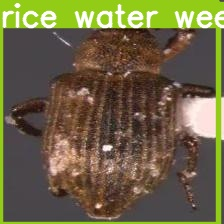

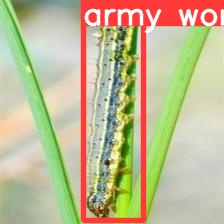

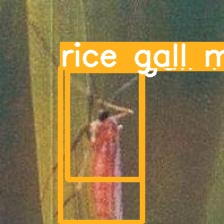

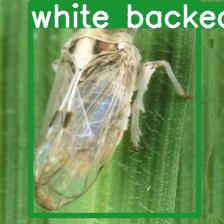

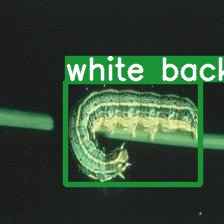

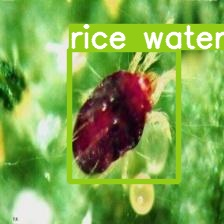

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Export Model

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [ ]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=onnx

2023-06-24 07:04:54.261620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 07:04:55.603331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from /content/runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) and output shape (1, 14, 8400) (49.6 MB)

ONNX: starting export with onnx 1.14.0...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 3.2s, save